In [56]:
import pandas as pd

df = pd.read_csv("spambase.csv", names = ["word_freq_make",         
"word_freq_address",      
"word_freq_all",          
"word_freq_3d",           
"word_freq_our",          
"word_freq_over",         
"word_freq_remove",       
"word_freq_internet",     
"word_freq_order",        
"word_freq_mail",         
"word_freq_receive",      
"word_freq_will",         
"word_freq_people",       
"word_freq_report",       
"word_freq_addresses",    
"word_freq_free",         
"word_freq_business",     
"word_freq_email",        
"word_freq_you",          
"word_freq_credit",       
"word_freq_your",         
"word_freq_font",         
"word_freq_000",          
"word_freq_money",        
"word_freq_hp",           
"word_freq_hpl",          
"word_freq_george",       
"word_freq_650",          
"word_freq_lab",          
"word_freq_labs",         
"word_freq_telnet",       
"word_freq_857",          
"word_freq_data",         
"word_freq_415",          
"word_freq_85",           
"word_freq_technology",   
"word_freq_1999",         
"word_freq_parts",        
"word_freq_pm",           
"word_freq_direct",       
"word_freq_cs",           
"word_freq_meeting",      
"word_freq_original",     
"word_freq_project",      
"word_freq_re",           
"word_freq_edu",          
"word_freq_table",        
"word_freq_conference",   
"char_freq_;",            
"char_freq_(",            
"char_freq_[",            
"char_freq_!",            
"char_freq_$",            
"char_freq_#",            
"capital_run_length_average", 
"capital_run_length_longest", 
"capital_run_length_total", "class"])

In [57]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [58]:
df.shape

(4601, 58)

BUILDING MACHINE LEARNING MODEL

In [64]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=34)

In [65]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8306188925081434

In [ ]:
TESTING ACCURACY OF MODEL
METHOD 1) mean accuracy

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)

predicted = model.predict(test_x)
model.score(test_x, test_y)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9370249728555917

METHOD 2) ROC AUC

In [69]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.9745294175618409

METHOD 3) confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[528,  28],
       [ 30, 335]])

In [71]:
# accuracy is good using confusion matrix as large numbers in top left and bottom right corners
# and small numbers in top right and bottom left corners

METHOD 4) precision and recall

In [72]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9295470884255931

In [73]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.8929558011049724

VISUALISING OUTPUT OF MODEL

Text(0, 0.5, 'True Positive Rate')

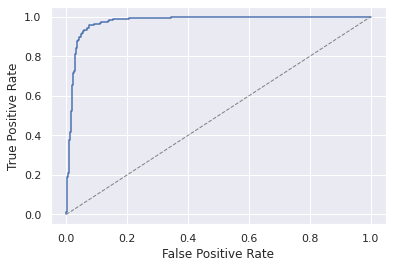

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# the below indicates a near perfect classifier (0.97)

In [77]:
from collections import Counter, defaultdict

def predict_spam(text):
    text = text.split(" ")
    totalWords = len(text)
    totalChar = 0
    
    keyWords = ["address","all","3d", "our", "over", "remove", "internet", "order", "mail", "receive", "will", "people", "report", "addresses", "free", "business", "email", "you", "credit", "your", "font", "000", "money", "hp", "hpl", "george", "650", "lab", "labs", "telnet", "857", "data", "415", "85", "technology", "1999", "parts", "pm", "direct", "cs", "meeting", "original", "project", "re", "edu", "table", "conference"]
    keyChar =  [";", "(", "[", "!", "$", "#"]
    keyWordsCount = Counter(keyWords)
    keyCharCount = Counter(keyChar)
    for word in text:
        if word in keyWords:
            keyWordsCount[word]+=1
        for char in word:
            if char in keyChar:
                keyCharCount[char]+=1
                totalChar+=1
    featureData = []
    for word in keyWords:
        if totalWords > 0: 
            featureData.append((keyWordsCount[word]-1)/totalWords * 100) 
    for char in keyChar: 
        if totalChar > 0:
            featureData.append((keyCharCount[char]-1)/totalChar * 100) 
    print(featureData)

predict_spam("address all address the people over remove !")
    
        
        
    

[25.0, 12.5, 0.0, 0.0, 12.5, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
